In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('data-ori.csv')

In [33]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [34]:
df.tail()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in
4411,33.5,10.9,3.44,5.8,275,31.7,32.5,97.4,99,F,out


In [35]:
df.shape

(4412, 11)

In [36]:
df = df.iloc[:,[0,4]].values

In [37]:
df

array([[ 35.1, 310. ],
       [ 43.5, 334. ],
       [ 33.5, 305. ],
       ...,
       [ 33.2, 235. ],
       [ 31.5, 187. ],
       [ 33.5, 275. ]])

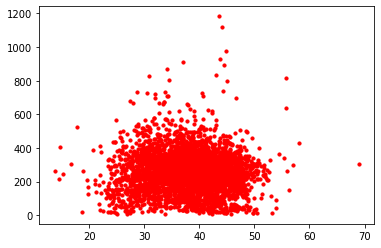

In [38]:
plt.scatter(df[:,0],df[:,1],s=10,c='red')

In [39]:
from sklearn.cluster import KMeans

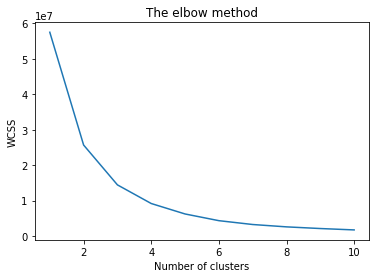

In [44]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++',max_iter=300,n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan = DBSCAN(eps=5,min_samples=5)

In [47]:
labels = dbscan.fit_predict(df)

In [48]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

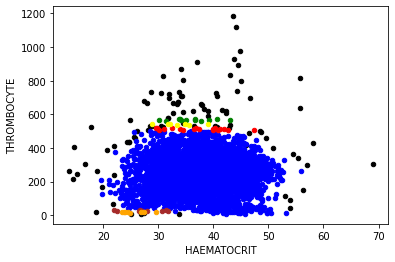

In [53]:
plt.scatter(df[labels==-1,0],df[labels==-1,1],s=20,c='black')
plt.scatter(df[labels==0,0],df[labels==0,1],s=20,c='blue')
plt.scatter(df[labels==1,0],df[labels==1,1],s=20,c='green')
plt.scatter(df[labels==2,0],df[labels==2,1],s=20,c='red')
plt.scatter(df[labels==3,0],df[labels==3,1],s=20,c='yellow')
plt.scatter(df[labels==4,0],df[labels==4,1],s=20,c='brown')
plt.scatter(df[labels==5,0],df[labels==5,1],s=20,c='orange')
plt.xlabel('HAEMATOCRIT')
plt.ylabel('THROMBOCYTE')
plt.show()